


1. Load the data   

2. EDA (Explore, Visualise, Understand) ← ⬅️ you are here  

3. Data Preprocessing

    - Handle missing values
    - Encode categorical features (LabelEncoding / TF-IDF / OneHot)
    - Scale numerical features (if needed)

4. Train/test split

5. Model training

6. Evaluation












In [2]:
import pandas as pd
df = pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [3]:
# Basic shape
print("Shape:", df.shape)

# Column names and types
print("\nInfo:")
print(df.info())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (15915, 23)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection

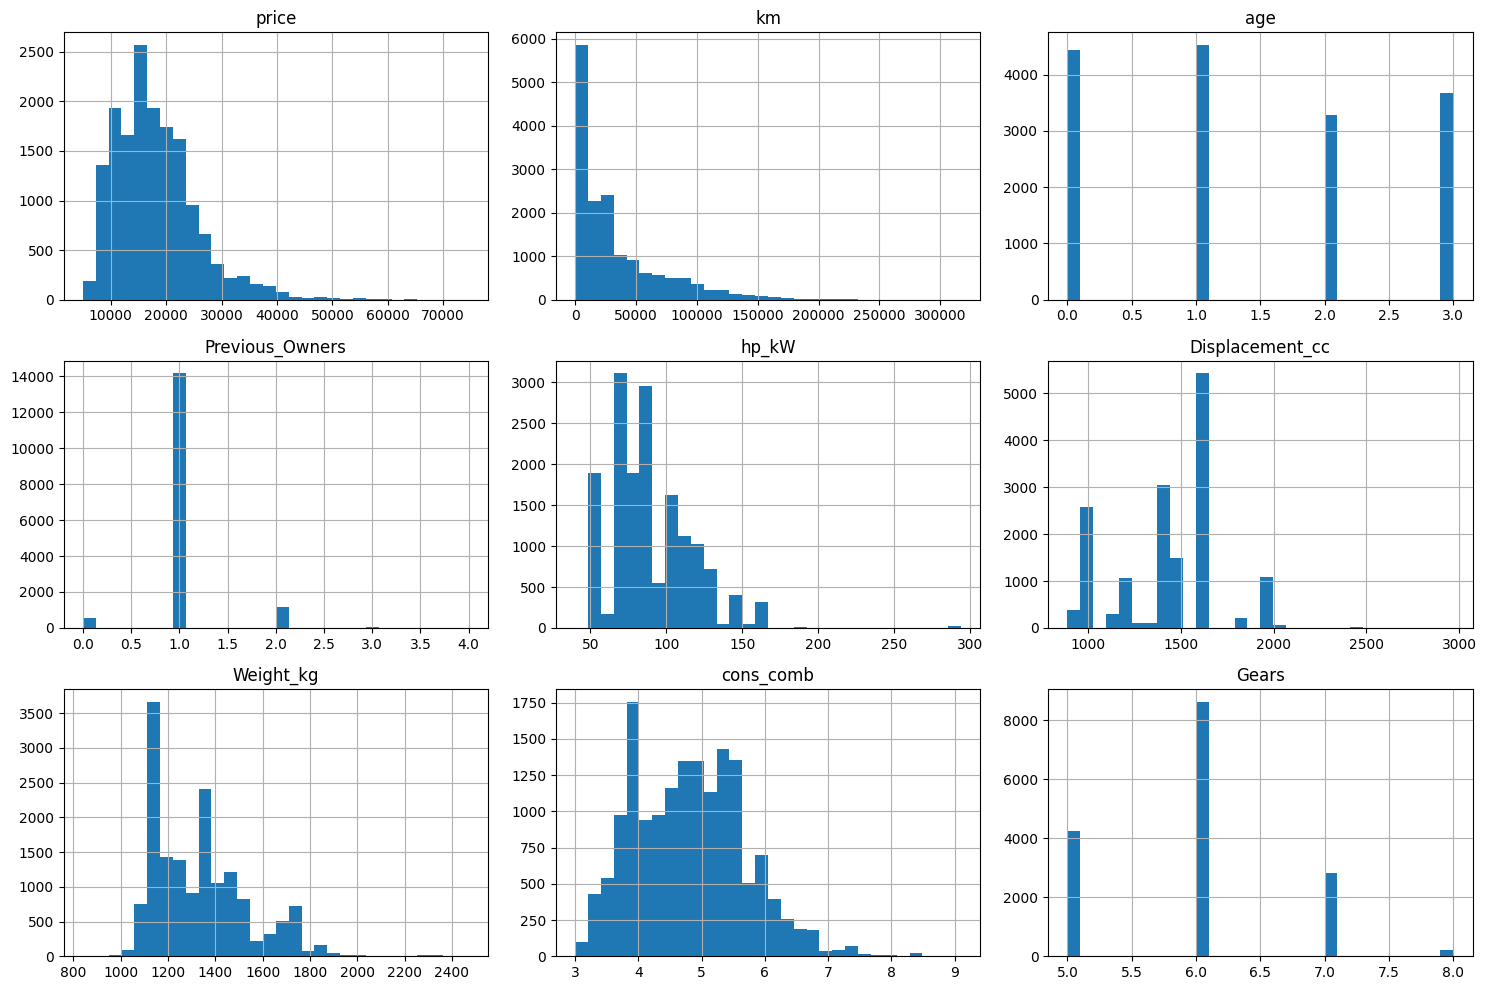

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal değişkenlerin listesi
numerical_cols = ['price', 'km', 'age', 'Previous_Owners', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb', 'Gears']

# Histogramlar
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [5]:
#
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

make_model: 9 unique values
body_type: 8 unique values
vat: 2 unique values
Type: 5 unique values
Fuel: 4 unique values
Comfort_Convenience: 6196 unique values
Entertainment_Media: 346 unique values
Extras: 659 unique values
Safety_Security: 4442 unique values
Paint_Type: 3 unique values
Upholstery_type: 2 unique values
Gearing_Type: 3 unique values
Drive_chain: 3 unique values


In [6]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 
for col in cat_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")


make_model:
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

body_type:
body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

vat:
vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

Type:
Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

Fuel:
Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

Comfort_Convenience:
Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                           

In [7]:
from collections import Counter

# Helper function to extract top N features from comma-separated multi-label column
def get_top_features(df, column, top_n=20):
    exploded = df[column].str.split(',').explode().str.strip()
    return [item for item, _ in Counter(exploded).most_common(top_n)]


# Extract top 20 features for each multi-label column
comfort_options = get_top_features(df, "Comfort_Convenience", top_n=100)
entertainment_options = get_top_features(df, "Entertainment_Media", top_n=100)
extras_options = get_top_features(df, "Extras", top_n=100)
safety_options = get_top_features(df, "Safety_Security", top_n=100)


In [8]:
comfort_options

['Air conditioning',
 'Power windows',
 'Electrical side mirrors',
 'Multi-function steering wheel',
 'Cruise control',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Leather steering wheel',
 'Start-stop system',
 'Automatic climate control',
 'Rain sensor',
 'Navigation system',
 'Light sensor',
 'Armrest',
 'Seat heating',
 'Hill Holder',
 'Parking assist system sensors front',
 'Parking assist system camera',
 'Lumbar support',
 'Heated steering wheel',
 'Keyless central door lock',
 'Split rear seats',
 'Electrically adjustable seats',
 'Tinted windows',
 'Electric tailgate',
 'Electrically heated windshield',
 'Seat ventilation',
 'Parking assist system self-steering',
 'Panorama roof',
 'Heads-up display',
 'Sunroof',
 'Massage seats',
 'Auxiliary heating',
 'Air suspension',
 'Leather seats',
 'Wind deflector',
 'Windshield',
 'Electric Starter']

In [9]:
entertainment_options

['On-board computer',
 'Radio',
 'Bluetooth',
 'Hands-free equipment',
 'USB',
 'MP3',
 'CD player',
 'Sound system',
 'Digital radio',
 'Television']

In [10]:
extras_options

['Alloy wheels',
 'Voice Control',
 'Touch screen',
 'Sport seats',
 'Roof rack',
 'Catalytic Converter',
 'Sport suspension',
 'Sport package',
 'Trailer hitch',
 'Shift paddles',
 'Cab or rented Car',
 'Ski bag',
 'Winter tyres',
 'Handicapped enabled',
 'Tuned car',
 'Sliding door',
 'Right hand drive']

In [11]:
safety_options

['ABS',
 'Driver-side airbag',
 'Power steering',
 'Passenger-side airbag',
 'Electronic stability control',
 'Side airbag',
 'Central door lock',
 'Isofix',
 'Traction control',
 'Tire pressure monitoring system',
 'Daytime running lights',
 'Immobilizer',
 'Fog lights',
 'LED Daytime Running Lights',
 'Xenon headlights',
 'Emergency brake assistant',
 'LED Headlights',
 'Lane departure warning system',
 'Central door lock with remote control',
 'Head airbag',
 'Adaptive headlights',
 'Traffic sign recognition',
 'Alarm system',
 'Emergency system',
 'Blind spot monitor',
 'Adaptive Cruise Control',
 'Rear airbag',
 'Driver drowsiness detection',
 'Night view assist']

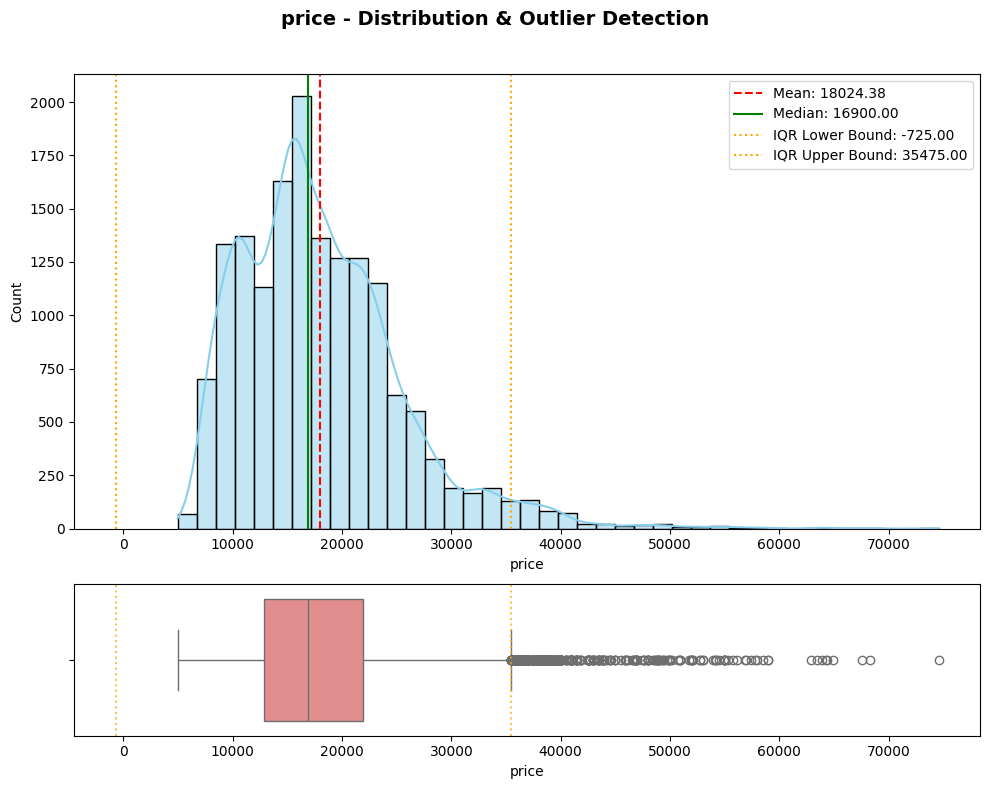

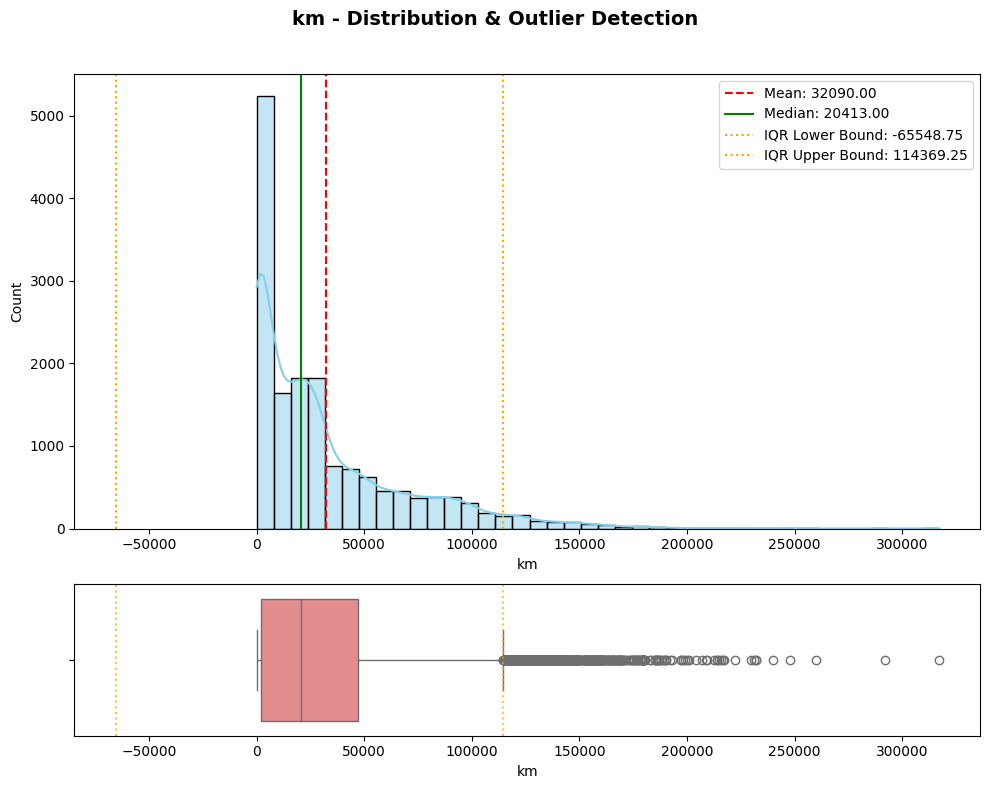

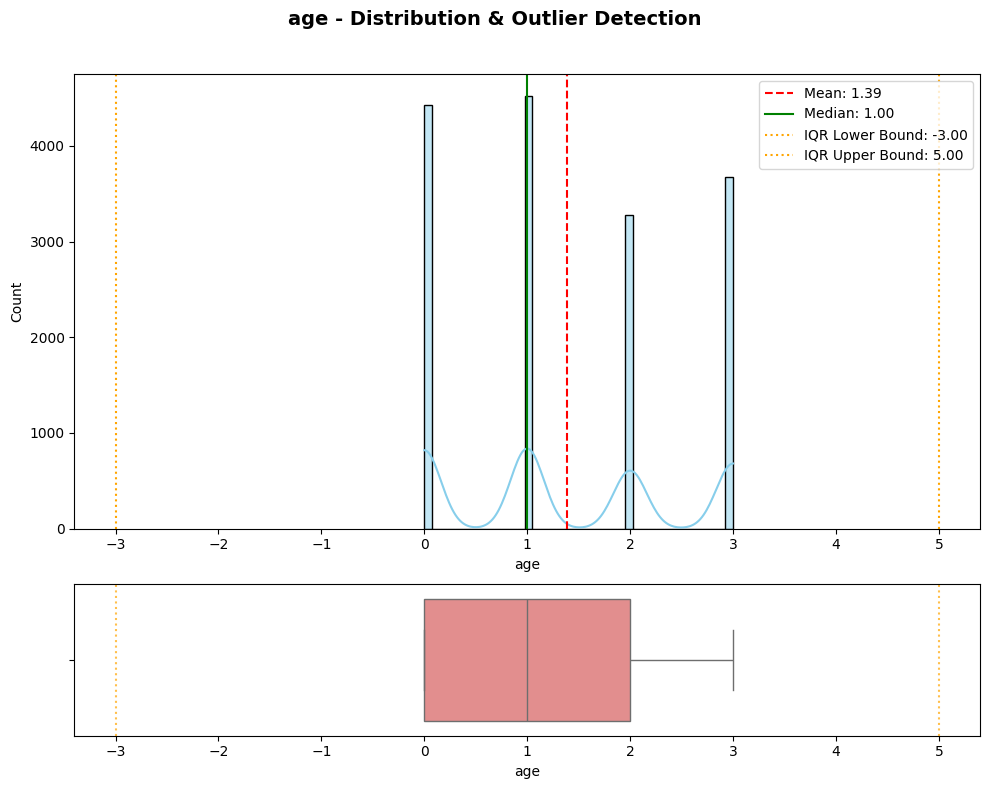

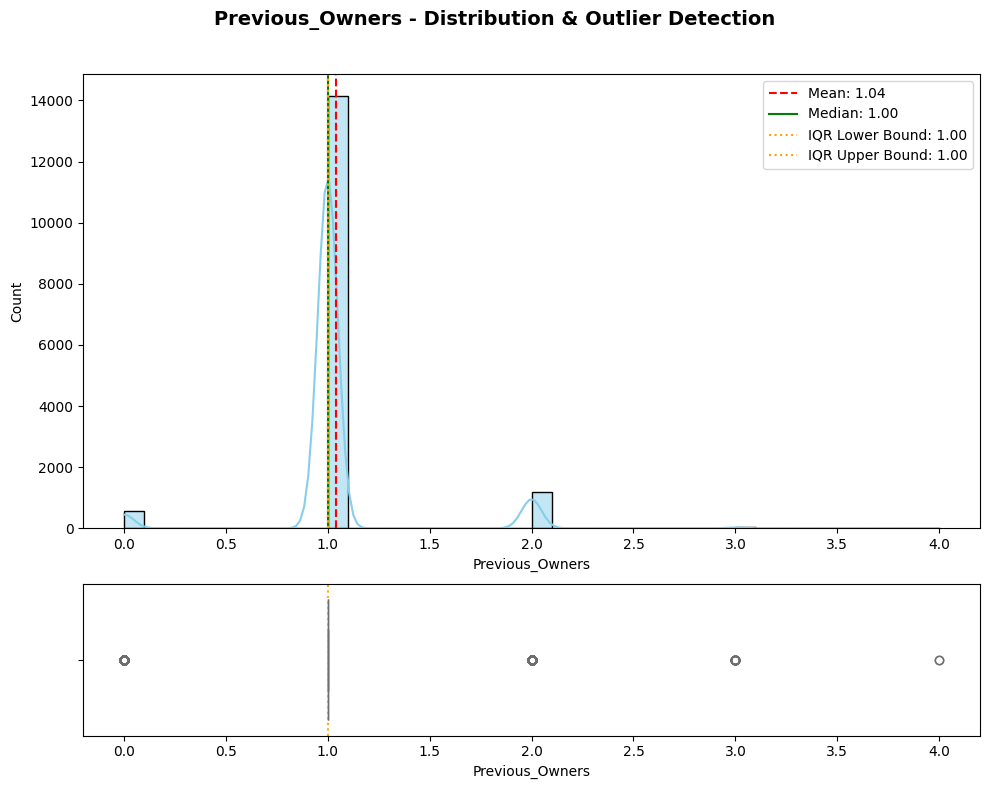

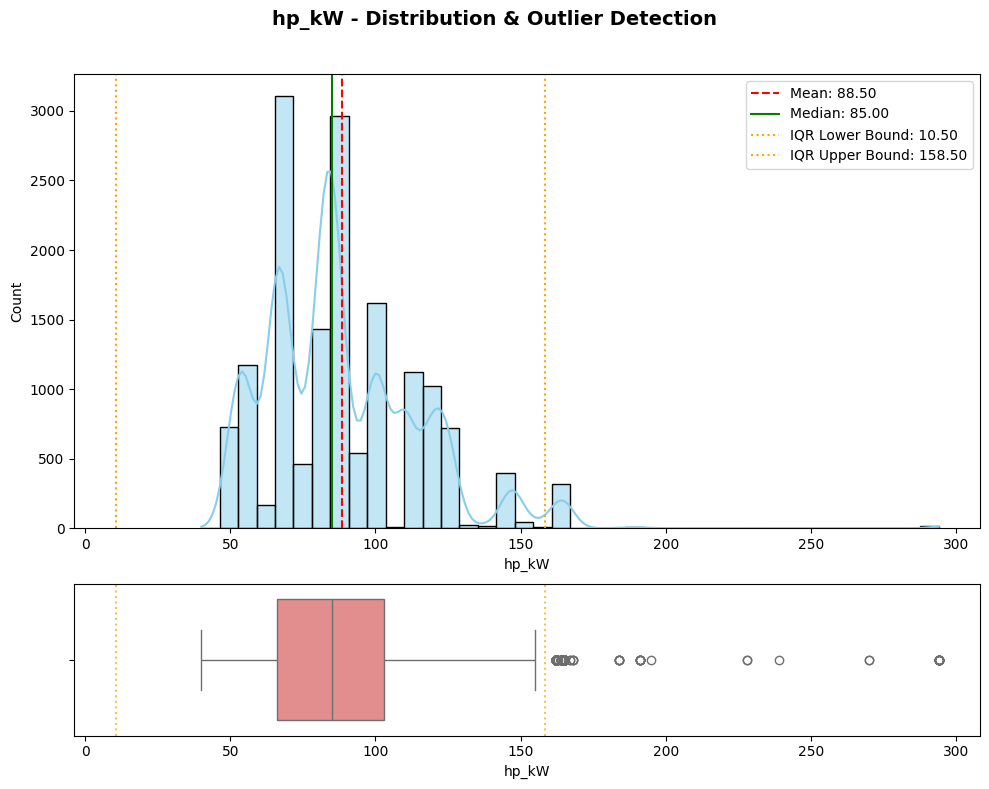

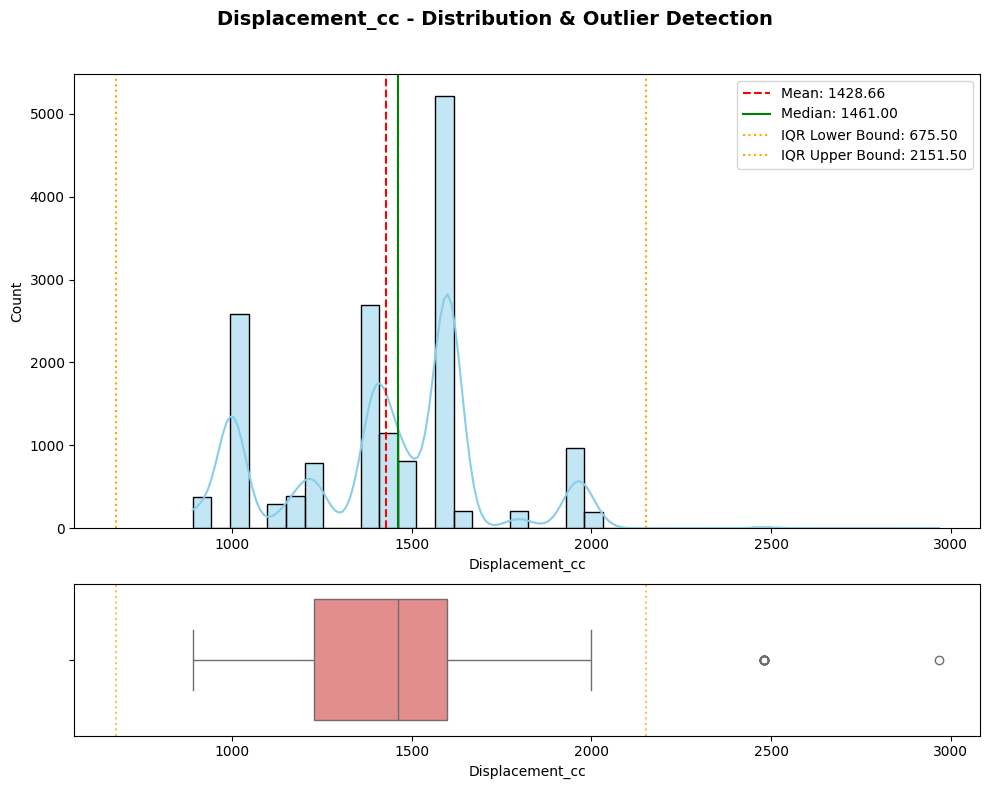

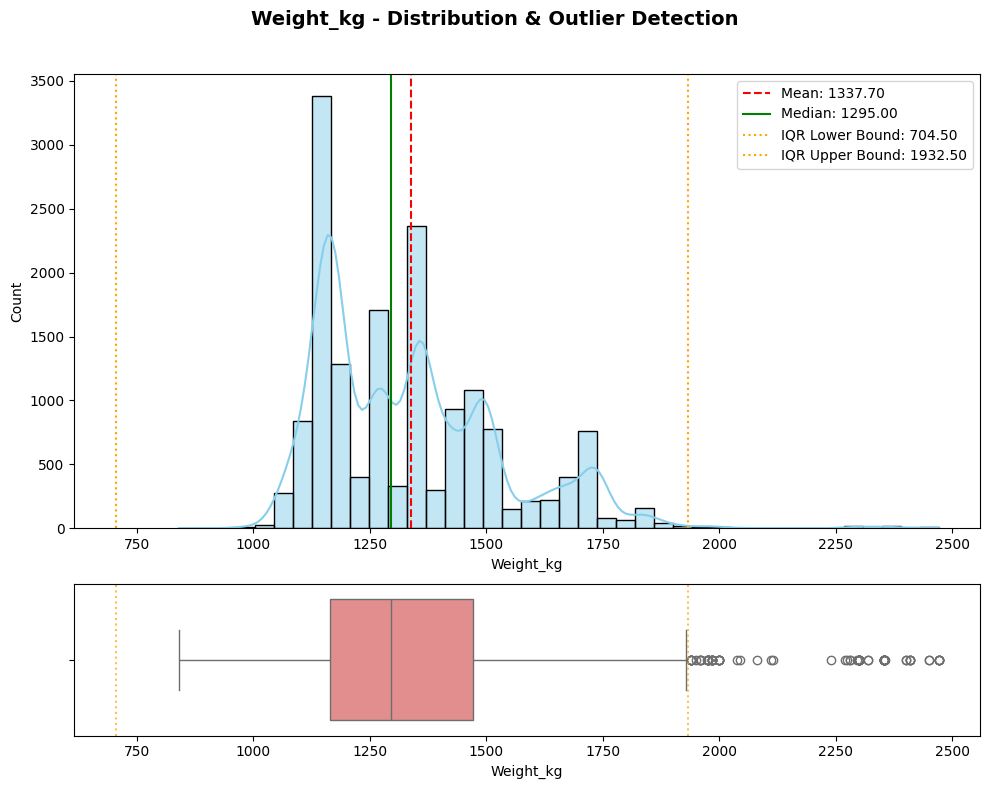

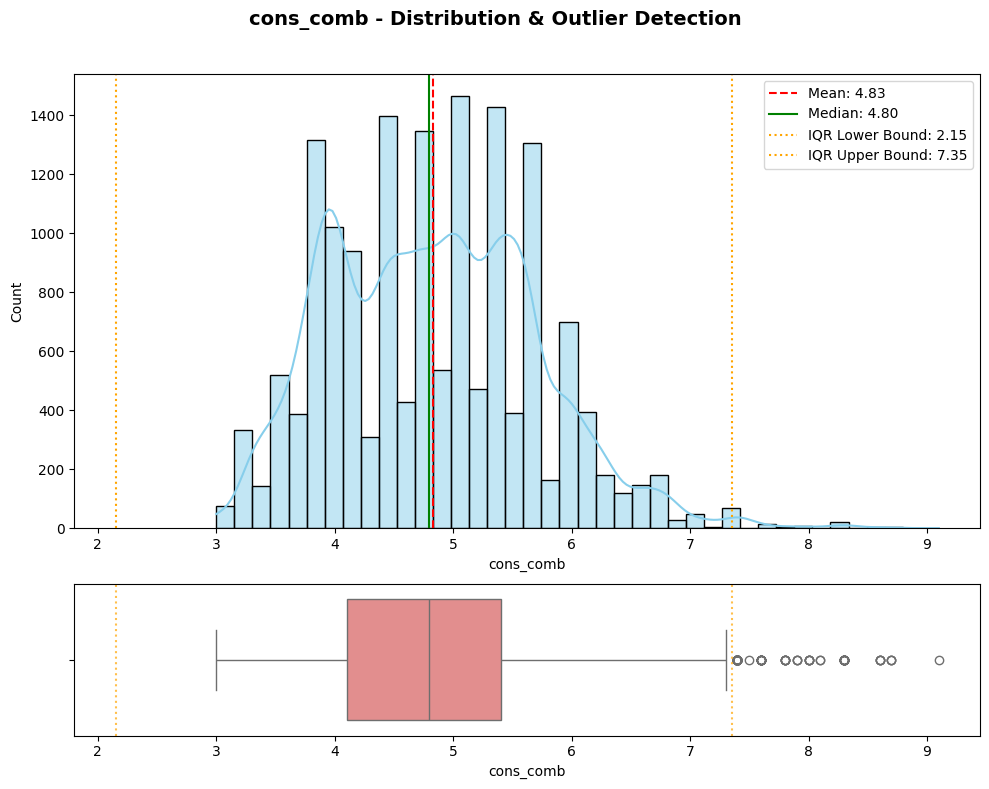

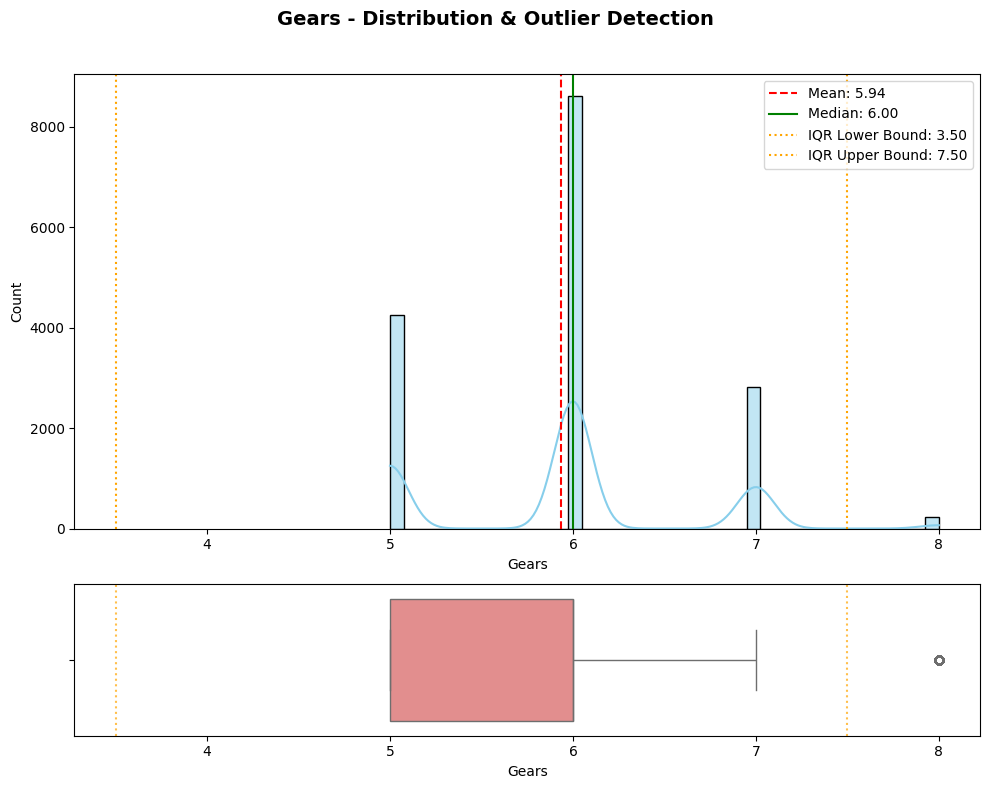

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_detailed_outlier_analysis(df, numeric_columns):
    for col in numeric_columns:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mean = data.mean()
        median = data.median()

        fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
        fig.suptitle(f"{col} - Distribution & Outlier Detection", fontsize=14, fontweight="bold")

        # Upper plot: histogram + KDE
        sns.histplot(data, kde=True, ax=ax[0], color="skyblue", bins=40)
        ax[0].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
        ax[0].axvline(median, color='green', linestyle='-', label=f"Median: {median:.2f}")
        ax[0].axvline(lower, color='orange', linestyle=':', label=f"IQR Lower Bound: {lower:.2f}")
        ax[0].axvline(upper, color='orange', linestyle=':', label=f"IQR Upper Bound: {upper:.2f}")
        ax[0].legend()

        # Lower plot: boxplot
        sns.boxplot(x=data, ax=ax[1], color="lightcoral")
        ax[1].axvline(lower, color='orange', linestyle=':', alpha=0.7)
        ax[1].axvline(upper, color='orange', linestyle=':', alpha=0.7)

        plt.tight_layout()
        plt.subplots_adjust(top=0.90)
        plt.show()

# Usage:
plot_detailed_outlier_analysis(df, numerical_cols)


In [14]:
high_price_df = df[df['price'] >= 40000]
high_price_df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3587,Audi A3,Sedans,64900,VAT deductible,35000.000000,Used,Benzine,7.0,"Air conditioning,Seat ventilation,Split rear s...",Radio,...,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1585.0,front,8.3
3590,Audi A3,Sedans,62900,VAT deductible,700.000000,Used,Benzine,7.0,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",...,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1585.0,front,8.3
3592,Audi A3,Sedans,56900,VAT deductible,5200.000000,Used,Benzine,7.0,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...",...,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1585.0,4WD,8.3
3593,Audi A3,Sedans,58500,VAT deductible,10000.000000,Used,Benzine,7.0,"Air conditioning,Seat ventilation,Split rear s...",Radio,...,1.0,294.0,0,Metallic,Part/Full Leather,Semi-automatic,2480.0,1585.0,front,8.3
3594,Audi A3,Sedans,58990,VAT deductible,7500.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...",...,1.0,228.0,0,Metallic,Part/Full Leather,Semi-automatic,1984.0,1360.0,4WD,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15896,Renault Espace,Van,41480,VAT deductible,8500.000000,Demonstration,Benzine,6.0,"Air conditioning,Automatic climate control,Cru...",Sound system,...,1.0,165.0,1,Metallic,Part/Full Leather,Automatic,1798.0,1843.0,front,7.4
15897,Renault Espace,Van,41400,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB",...,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.1
15898,Renault Espace,Sedans,41043,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...",...,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1685.0,front,5.3
15900,Renault Espace,Station wagon,41390,VAT deductible,50.000000,Pre-registered,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...",...,1.0,118.0,0,Metallic,Cloth,Automatic,1997.0,1833.0,front,5.3


In [15]:
df = df[df['price'] <= 40000].reset_index(drop=True)

In [16]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000,15755.000000
mean,17721.075849,32368.062398,5.932783,1.402031,1.044557,87.697049,0.247794,1423.699207,1334.368518,4.816093
std,6740.839700,37048.168313,0.704626,1.119028,0.338837,25.084065,0.431745,271.476846,197.492643,0.849456
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12750.000000,2500.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16879.000000,20744.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1285.000000,4.800000
75%,21824.500000,47100.000000,6.000000,2.000000,1.000000,100.000000,0.000000,1598.000000,1441.000000,5.400000
max,39995.000000,317000.000000,8.000000,3.000000,4.000000,239.000000,1.000000,2967.000000,2471.000000,9.100000


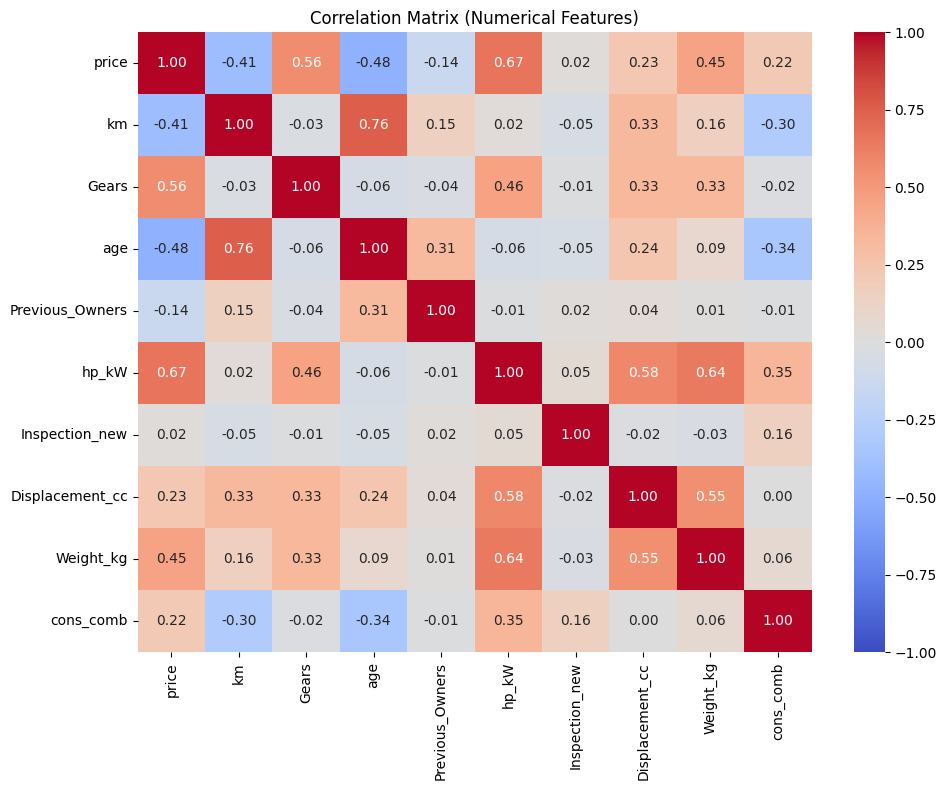

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numerical columns only)
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

#            M.    O.   D.   E.   L. 

In [18]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df.drop(columns=['price'])
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12604, 22)
Train target shape   :  (12604,)
Test features shape  :  (3151, 22)
Test target shape    :  (3151,)


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor

def comma_tokenizer(text):
    return text.split(',')

# Column groups
numeric_features = ['km', 'age', 'hp_kW', 'cons_comb', 'Gears', 'Weight_kg', 'Displacement_cc', 'Previous_Owners','Inspection_new']
categorical_features = ['make_model','Fuel', 'Gearing_Type', 'Drive_chain', 'body_type', 'vat', 'Type', 'Paint_Type', 'Upholstery_type']
text_features = ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']

# TF-IDF Transformers
comfort_tfidf = TfidfVectorizer(tokenizer=comma_tokenizer)
entertainment_tfidf = TfidfVectorizer(tokenizer=comma_tokenizer)
extras_tfidf = TfidfVectorizer(tokenizer=comma_tokenizer)
safety_tfidf = TfidfVectorizer(tokenizer=comma_tokenizer)

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('comfort', comfort_tfidf, 'Comfort_Convenience'),
    ('entertainment', entertainment_tfidf, 'Entertainment_Media'),
    ('extras', extras_tfidf, 'Extras'),
    ('safety', safety_tfidf, 'Safety_Security'),
])

# Final pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [28]:
model_pipeline.fit(X_train, y_train)


/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['km', 'age', 'hp_kW',
                                                   'cons_comb', 'Gears',
                                                   'Weight_kg',
                                                   'Displacement_cc',
                                                   'Previous_Owners',
                                                   'Inspection_new']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make_model', 'Fuel',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'body_type',
                                                   'vat', 'Type', 'Paint_Type',
                                                   'Upholstery_type']),...
                                                  'Comfort_Convenience'),
                                                 ('entertainment',
                                                  TfidfVectorizer(tokenizer=<function comma_tokenizer at 0x3366fb130>),
                                                  'Entertainment_Media'),
                                                 ('extras',
                                                  TfidfVectorizer(tokenizer=<function comma_tokenizer at 0x3366fb130>),
                                                  'Extras'),
                                                 ('safety',
                                                  TfidfVectorizer(tokenizer=<function comma_tokenizer at 0x3366fb130>),
                                                  'Safety_Security')])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 858.61
RMSE: 1415.66
R² Score: 0.95


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd

def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
            "mape": mean_absolute_percentage_error(y_train, y_train_pred)
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": mean_squared_error(y_test, y_pred, squared=False),
            "mape": mean_absolute_percentage_error(y_test, y_pred)
        }
    }

    return pd.DataFrame(scores)


In [31]:
train_val(model_pipeline, X_train, y_train, X_test, y_test)

,train,test
R2,0.993671,9.543881e-01
mae,324.682986,8.586135e+02
mse,289955.168065,2.004080e+06
rmse,538.474854,1.415655e+03
mape,0.018484,4.891109e-02


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

operations = [
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(random_state=101))
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error',
        'neg_mean_absolute_percentage_error'
    ],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]  # View test scores

/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zaferyildirim/data1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not Non

test_r2                                     9.548729e-01
train_r2                                    9.934387e-01
test_neg_mean_absolute_error               -8.701896e+02
train_neg_mean_absolute_error              -3.313840e+02
test_neg_mean_squared_error                -2.060346e+06
train_neg_mean_squared_error               -3.005536e+05
test_neg_root_mean_squared_error           -1.433981e+03
train_neg_root_mean_squared_error          -5.482209e+02
test_neg_mean_absolute_percentage_error    -4.968444e-02
train_neg_mean_absolute_percentage_error   -1.886735e-02
dtype: float64

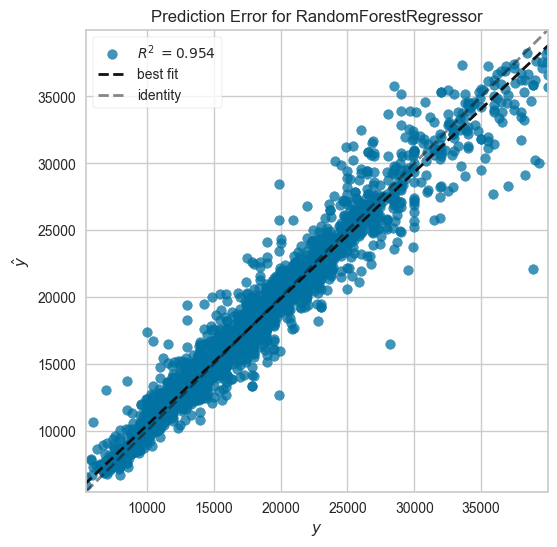

In [33]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = model_pipeline
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Values bigger than 10 effect our predictions.

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def report_model(model, number_of_tree, X_train, y_train, X_test, y_test):
    # Predict
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Evaluation
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')

    # Get feature names from preprocessor
    features = model.named_steps["preprocessing"].get_feature_names_out()

    # Plot selected tree from the forest
    plt.figure(figsize=(15, 8), dpi=100)
    plot_tree(
        model.named_steps["regressor"].estimators_[number_of_tree],
        filled=True,
        feature_names=features,
        fontsize=8
    )
    plt.title(f"Random Forest Tree #{number_of_tree}")
    plt.show()




              train          test
R2         0.993671  9.543881e-01
mae      324.682986  8.586135e+02
mse   289955.168065  2.004080e+06
rmse     538.474854  1.415655e+03
mape       0.018484  4.891109e-02




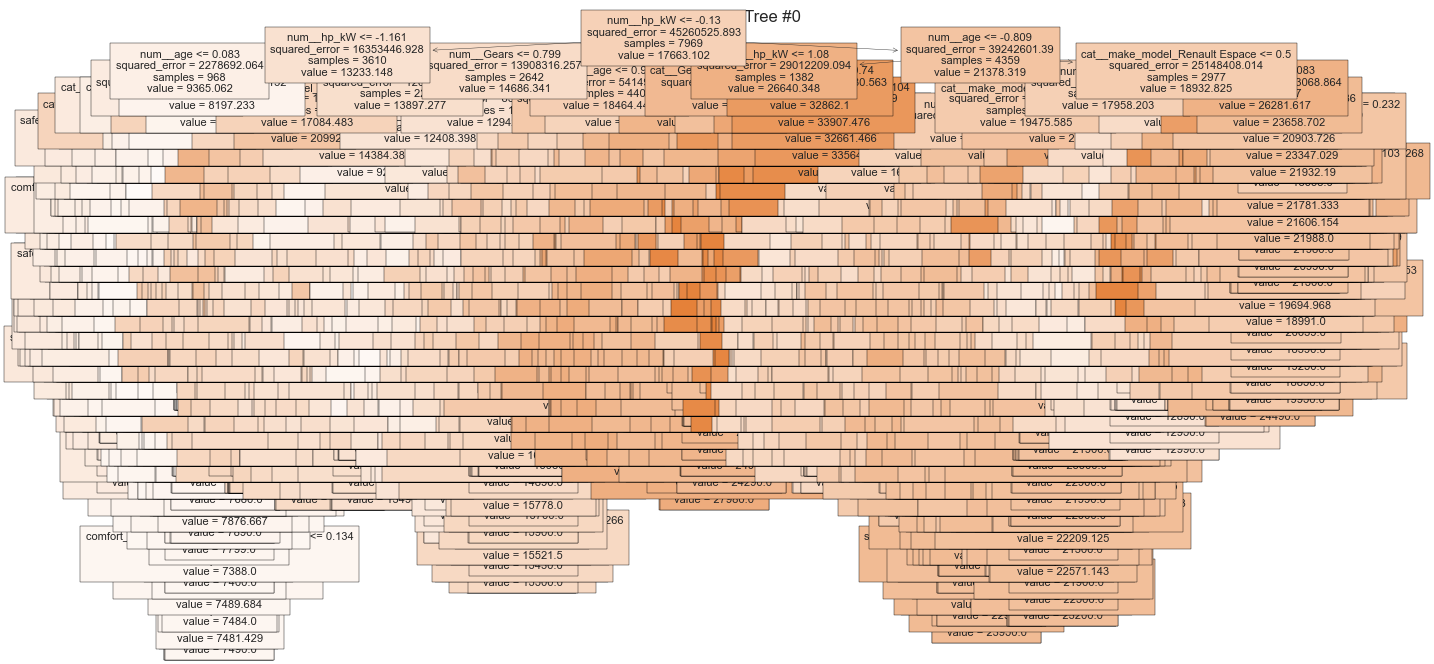

In [35]:
report_model(model, number_of_tree=0, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [36]:


import joblib

# Save the trained pipeline
joblib.dump(model_pipeline, "car_price_predictor.pkl")





['car_price_predictor.pkl']

In [37]:
import joblib

model = joblib.load("car_price_predictor.pkl")

In [39]:
# varsayım: X_test hala bellekte
sample = X_test.iloc[[12]]
sample

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3546,Audi A3,Sedans,VAT deductible,89346.0,Used,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...",Bluetooth,Alloy wheels,...,1.0,81.0,0,Metallic,Part/Full Leather,Manual,1598.0,1360.0,front,4.0


In [41]:
y_test.iloc[12]

15900

In [42]:
prediction = model.predict(sample)
print(f"Predicted price: €{prediction[0]:,.2f}")

Predicted price: €14,934.74


In [43]:
real_price = y_test.iloc[12]
print(f"Actual price   : €{real_price:,.2f}")

Actual price   : €15,900.00


In [44]:
import numpy as np
import pandas as pd

# Randomly select 5 indices from the test set
np.random.seed(42)
random_indices = np.random.choice(X_test.index, size=5, replace=False)

# Get the corresponding samples
X_sample = X_test.loc[random_indices]
y_actual = y_test.loc[random_indices]
y_predicted = model_pipeline.predict(X_sample)

# Create a DataFrame to display actual vs. predicted prices
comparison_df = pd.DataFrame({
    'Actual Price (€)': y_actual.values,
    'Predicted Price (€)': np.round(y_predicted, 2)
}, index=random_indices)

# Format for readability
comparison_df['Actual Price (€)'] = comparison_df['Actual Price (€)'].map(lambda x: f"€{x:,.2f}")
comparison_df['Predicted Price (€)'] = comparison_df['Predicted Price (€)'].map(lambda x: f"€{x:,.2f}")

comparison_df.reset_index(drop=True, inplace=True)
comparison_df


,Actual Price (€),Predicted Price (€)
0,"€27,990.00","€25,107.12"
1,"€7,900.00","€7,649.20"
2,"€17,992.00","€18,421.46"
3,"€9,999.00","€9,999.00"
4,"€23,000.00","€21,353.92"


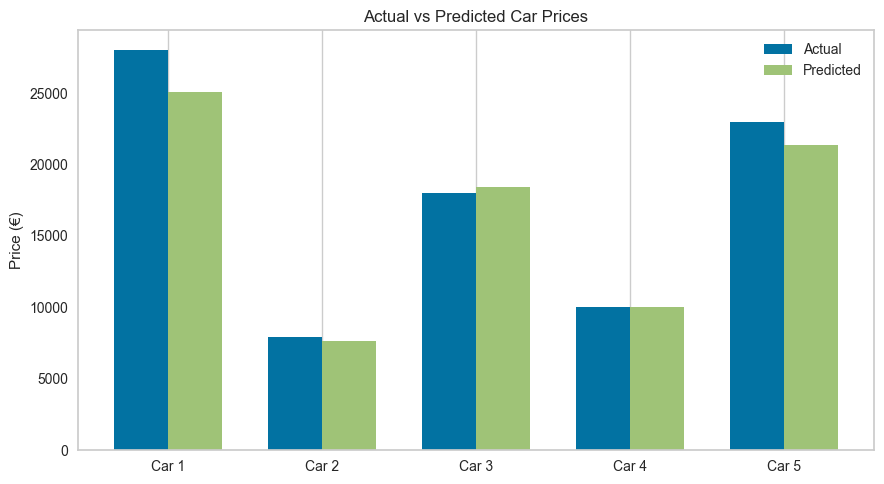

In [46]:
# Remove € and convert to float
actual = [27990, 7900, 17992, 9999, 23000]
predicted = [25107.12, 7649.20, 18421.46, 9999.00, 21353.92]


labels = [f"Car {i}" for i in range(1, 6)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, actual, width, label='Actual')
bars2 = ax.bar(x + width/2, predicted, width, label='Predicted')

ax.set_ylabel('Price (€)')
ax.set_title('Actual vs Predicted Car Prices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()